# About the Project

## The Customer

The customer is a fashion retailer with numerous stores across Germany. It collected data of articles that have been on sale over a period of time in the stores. (More info..)

## The Task

The fashion retailer want to use his data for:

  * sales volume predictions for articles 
  * optimal price determination of new articles on market launch
  * inventory calculation 
  * general predictions and strategic decision making
  
Such predictions needs a basic population, which serve as a basis for statistical calculations.
Predicting the sales of a specific article on basis of the whole assortment would be too imprecise.
The mean variation is too high, hence the quality of the prediction would be very low.
The multiplicity of articles allows to refer on a more representative population. For an optimal prediction quality, the population should be as big as possible and his mean variation as small as possible. It is possible to create such a population, by grouping articles with similar characteristic attributes to one unit. This can be realized through a clustering algorithm.

## The Goal

The overall goal of the project is to develop a clustering algorithm. This algorithm should be reasonable and statistically established. Further, the cluster building should be done on basis of revenue, article counts or sales quotas of the articles and every article has to be assigned to a cluster.

# Data Introduction

First, we want to give an overview of the provided data. Therefore, we have a look at the raw dataset and 
do some visualization for a better understanding of the data.

In [1]:
# Needed imports for the rest of the notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tailor
from tailor import data
from tailor import clustering
from tailor.visualization import *

## Example of the Raw Data

In [2]:
raw_data = data.load_csv()
raw_data.head(10)

,article_id,transaction_date,markdown_start_date,markdown_end_date,original_price,sells_price,discount,markdown,article_count,season,brand,color,stock_total,avq,Abteilung,WHG,WUG,time_on_sale,revenue
0,900001,2014-03-27,2013-10-18,2014-05-31,59.95,53.95,6.00,0.0,2,Sommer,Fimmilena,mittelbraun,1499,0.133422,Abteilung005,WHG021,WUG073,0,107.90
1,900001,2014-03-28,2013-10-18,2014-05-31,59.95,59.95,0.00,0.0,2,Sommer,Fimmilena,mittelbraun,1499,0.266845,Abteilung005,WHG021,WUG073,1,119.90
2,900001,2014-03-29,2013-10-18,2014-05-31,59.95,59.95,0.00,0.0,3,Sommer,Fimmilena,mittelbraun,1499,0.466978,Abteilung005,WHG021,WUG073,2,179.85
3,900001,2014-03-31,2013-10-18,2014-05-31,59.95,59.55,0.40,0.0,5,Sommer,Fimmilena,mittelbraun,1499,0.800534,Abteilung005,WHG021,WUG073,4,297.75
4,900001,2014-04-01,2013-10-18,2014-05-31,59.95,59.95,0.00,0.0,6,Sommer,Fimmilena,mittelbraun,1499,1.200801,Abteilung005,WHG021,WUG073,5,359.70
5,900001,2014-04-02,2013-10-18,2014-05-31,59.95,59.95,0.00,0.0,4,Sommer,Fimmilena,mittelbraun,1499,1.467645,Abteilung005,WHG021,WUG073,6,239.80
6,900001,2014-04-03,2013-10-18,2014-05-31,59.95,58.59,1.36,0.0,4,Sommer,Fimmilena,mittelbraun,1499,1.734490,Abteilung005,WHG021,WUG073,7,234.36
7,900001,2014-04-04,2013-10-18,2014-05-31,59.95,59.95,0.00,0.0,7,Sommer,Fimmilena,mittelbraun,1499,2.201468,Abteilung005,WHG021,WUG073,8,419.65
8,900001,2014-04-05,2013-10-18,2014-05-31,59.95,59.95,0.00,0.0,13,Sommer,Fimmilena,mittelbraun,1499,3.068712,Abteilung005,WHG021,WUG073,9,779.35
9,900001,2014-04-06,2013-10-18,2014-05-31,59.95,59.95,0.00,0.0,2,Sommer,Fimmilena,mittelbraun,1499,3.202135,Abteilung005,WHG021,WUG073,10,119.90


## Feature Overview

  * *markdown* is constant for *article_id* and *transaction_date* between *markdown_start_date* and *markdown_end_date*
  * *original_price* is constant for *article_id*
  * *sells_price* is the actual price paid by the customer
  * *sells_price*, *discount* and *markdown* are of the unit [Euro/article]
  * *article_count* denominates the number of sold articles
  * *discount* = *original_price* - *markdown* - *sells_price*
  * *avq* is the current stock divided by *stock_total*

In [3]:
pd.options.display.float_format = "{:.2f}".format
raw_data.describe(include=np.number)

,article_id,original_price,sells_price,discount,markdown,article_count,stock_total,avq,time_on_sale,revenue
count,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00
mean,904359.27,51.33,43.87,2.58,4.88,8.52,2162.84,30.12,87.38,317.27
std,2521.36,22.19,20.50,5.73,9.43,10.84,1960.91,22.89,50.69,385.77
min,900001.00,9.95,-47.96,-99.96,-19.00,1.00,106.00,0.00,0.00,-47.96
25%,902176.00,35.95,29.34,0.00,0.00,2.00,910.00,10.24,44.00,86.28
50%,904338.00,49.95,39.95,0.28,0.00,5.00,1737.00,26.28,86.00,190.95
75%,906569.00,64.95,58.02,2.50,10.00,11.00,2956.00,46.08,130.00,397.12
max,908708.00,179.95,199.91,129.96,90.00,281.00,36396.00,100.25,181.00,13403.60


## Consistency Checks

__Check if the dataset contains null values__

In [4]:
raw_data.isna().values.any()

False

We are lucky, there are no null values in the dataset!

__Detect how many articles are contained in the dataset__

In [5]:
len(raw_data['article_id'].unique())

8708

__Get the maximum timespan the articles have been on sale __

In [6]:
raw_data['time_on_sale'].max()

181

This means we will be comparing sales of articles over a course of 182 consecutive days. Counting starts at day 0.


__Check how many articles don't have values defined for each of the 182 days__

In [7]:
tos = raw_data.groupby('article_id').apply(lambda x: x.time_on_sale.nunique())
len(tos[tos == 182])

0

After all there are a lot of missing data, but they are hidden! We see not a single article has data for each of the 182 days they have been on sale! This problem has to be addressed in a later step.

## Visualization of the Raw Data

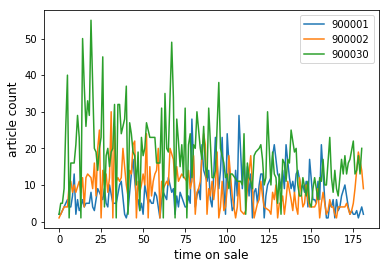

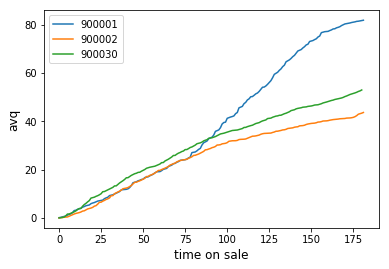

In [8]:
plot_articles(raw_data, [900001, 900002, 900030], 'article_count');
plot_articles(raw_data, [900001, 900002, 900030], 'avq');

# Data Processing

For the next step, we process the raw data into a consistent and suitable dataset.
Therefore, we perform the following steps:

1. __Drop invalid rows which do not make sense (e.g. negative sells price)__


2. __Transform the different columns into specific datatypes:__
  * *article_id* = category
  * *transaction_date* = datetime
  * *markdown_start_date* = datetime
  * *markdown_end_date* = datetime
  * *all other columns* with datatype object = category
  
  
3. __Build new features__
  * Build a new column and calculate the weeks an article has been on sale (weeks_on_sale)
  * Rebuild the season column with the season of the first transaction
  
  
4. __Group time on sale by weeks__
  * Replace the time_on_sale values through weeks on sale
  * As a result, we consider every article on a weekly basis instead of a daily basis
  
  
5. __Fill missing values__
  * As we found out before, not all articles have sales on each day for the consecutive 182 days. Therefore, we add extra rows with zero values for the missing *time_on_sales* values
  
6. __Data normalization__
  * Come up with it here are in a later paragraph?

# Data Exploration

Next, we want to give an overview of the processed data and illustrate our procedure. We will have a look at the processed dataset, do some visualizations and explanations for a better and deeper understanding of the data.

## Example of the Processed Data

In [9]:
processed_data = data.load_data()
processed_data.head(10)

,article_id,time_on_sale,original_price,markdown,stock_total,article_count,revenue,avq,sells_price,discount,brand,color,Abteilung,WHG,WUG,month,season,norm_article_count,norm_avq,norm_revenue
0,900001,0,59.95,0.00,1499,22,1304.90,0.72,59.31,0.64,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring,1.04,0.03,1.86
1,900001,1,59.95,0.00,1499,39,2332.61,3.10,59.81,0.14,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring,1.84,0.11,3.32
2,900001,2,59.95,0.00,1499,32,1891.40,5.30,59.11,0.84,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring,1.51,0.19,2.69
3,900001,3,59.95,0.00,1499,27,1596.69,7.20,59.14,0.81,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring,1.27,0.26,2.27
4,900001,4,59.95,0.00,1499,34,2026.30,9.34,59.60,0.35,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring,1.60,0.34,2.88
5,900001,5,59.95,0.00,1499,27,1594.66,11.67,59.06,0.89,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring,1.27,0.43,2.27
6,900001,6,59.95,0.00,1499,53,3159.35,14.45,59.61,0.34,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring,2.50,0.53,4.50
7,900001,7,59.95,0.00,1499,33,1946.54,16.86,58.99,0.96,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring,1.55,0.61,2.77
8,900001,8,59.95,0.00,1499,35,2096.92,19.16,59.91,0.04,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring,1.65,0.70,2.99
9,900001,9,59.95,12.00,1499,37,2188.15,21.77,59.14,-11.19,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,March,Spring,1.74,0.79,3.12


In [10]:
processed_data.dtypes

article_id            category
time_on_sale             int64
original_price         float64
markdown               float64
stock_total              int64
article_count            int64
revenue                float64
avq                    float64
sells_price            float64
discount               float64
brand                 category
color                 category
Abteilung             category
WHG                   category
WUG                   category
month                 category
season                category
norm_article_count     float64
norm_avq               float64
norm_revenue           float64
dtype: object

## Visualization of the Processed Data

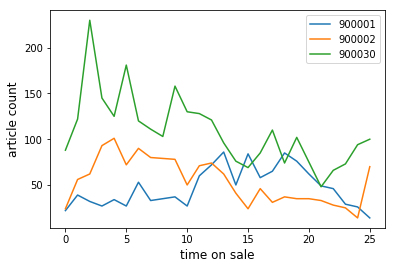

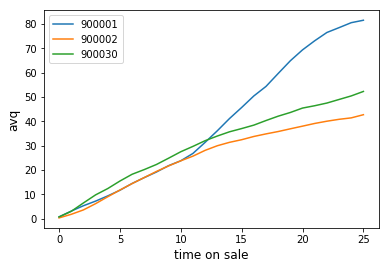

In [11]:
plot_articles(processed_data, [900001, 900002, 900030], 'article_count');
plot_articles(processed_data, [900001, 900002, 900030], 'avq');

In comparison to the raw data, you can see that the graphs no longer looks that messy. It is easier to identify which graphs are similar. Moreover we see that we removed seasonal effects by grouping the daily sales to weeks.

## Inter-Feature Variance

Remember that we want to identify a (sub-)population of articles that we can use for prediction or further analysis. 

For an optimal prediction quality this group has to be:

- As similar as possible (Small variance)
- As big as possible (Large sample size)

We want to create such a group by:

1. Splitting the population into groups where the the (article-)characteristics of a feature behave differently. (E.g. blue articles are different from red articles)
2. Grouping (article-)characteristics together that behave similarly. (E.g. blue and grey articles are similar to each other)

Here the **feature** is *color*, and the **characteristics** are *blue*, *grey* and *red*.

To find features, where this is easily possible, we will look at the **inter-feature variance**. The **inter-feature variance** measures the variance of the characteristics within a feature. A high **inter-feature variance** indicates differently behaving characteristics.

Next, we will look at the graphs some features to get an idea, how the different characteristics are distributed.

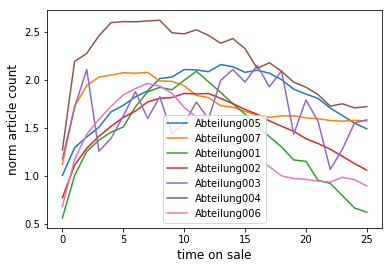

In [12]:
plot_feature_characteristics(processed_data, 'Abteilung', 'norm_article_count');

This graph visualizes the inter-feat variance of the feature 'Abteilung'. We can see that all curves are quite different from each other. That indicates that the individual characteristics should be treated individually. (Form an own cluster) 

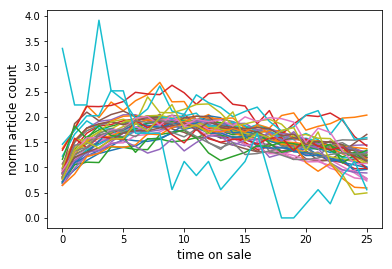

In [13]:
plot_feature_characteristics(processed_data, 'color', 'norm_article_count', legend=False);

This graph visualizes the inter-feat variance of the feature 'color'. Each curve represents the averaged sells of articles with the same color. We can see that quite a few curves in the middle look very similar, while at the top and bottom are 'far away' from the others. We can assume that the similar colors-curves in the middle should be treated the same (form a cluster together) and the curves which look different should be treated individually.

Indeed the values clearly show that ....

In [16]:
clustering.inter_feat_variance(processed_data, clustering.distance.absolute, 'Abteilung', 'article_count')

196.26291259783127

In [20]:
clustering.inter_feat_variance(processed_data, clustering.distance.absolute, 'color', 'article_count')

38.70680974010599

## The Cluster-Algorithm

### General

In general, the overall goal of the algorithm is to assign every existing article of the dataset to a cluster, based on the historical data of its revenue, article_count or sales quota.
The cluster will be formed through the combination of characteristics of the articles. 

__Example:__

__Cluster 1__:  
* _Abteilung_ = [Abteilung1, Abteilung3]
* _Color_ = [blau, himmelgrau]  
* _Season_ = [Sommer]
* ...

__Cluster 2__:  

* _Abteilung_ = [Abteilung2] 
* _Color_ = [khaki]  
* _Season_ = [Herbst, Winter]
* ...

Moreover, the variance within the cluster should be as low as possible, while the clusters themselves should be as big as possible to form a valid and representative population for further analysis. 

### Outline of the Algorithm

(rework...)
Therefore, we want to split the feature with the highest variance between the individual characteristics and group the individual characteristics into multiple (sub-)populations for a first segmentation. 

The idea here is to divide the whole population into multiple pieces with a lower variance. As from now, we will call the variation between the individual characteristics of a feature _inter-feat-variance_. **-->Unclear**
